<a href="https://colab.research.google.com/github/ellikamishra/Disaster-Non-Disaster-tweet-classifier/blob/master/Disaster/Non-Disaster%20Tweet%20Classifier%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np 
import pandas as pd 

In [31]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [32]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [33]:
#checking for null values

In [34]:
miss_val=(train.isnull().sum())
print(miss_val[miss_val>0])

keyword       61
location    2533
dtype: int64


In [35]:
#dividing test and train data to see disaster and non-disaster tweets

In [36]:
non_dis = train[train.target==0]['text']
non_dis.values[9]

'LOOOOOOL'

In [37]:
dis=train[train.target==1]['text']
dis.values[9]

"I'm afraid that the tornado is coming to our area..."

In [38]:
#counting target (0,1) i.e non-disaster and disaster tweets.

In [39]:
train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [40]:
'''
data visualisation using matplot,seaborn to plot-
1)Target values barplot
2)Most used keywords in tweets
3)Most tweeted from locations
4)Least tweeted from locations
'''


'\ndata visualisation using matplot,seaborn to plot-\n1)Target values barplot\n2)Most used keywords in tweets\n3)Most tweeted from locations\n4)Least tweeted from locations\n'

Text(0, 0.5, 'y')

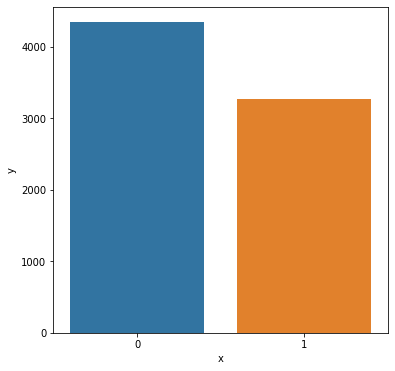

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6))
sns.barplot(train.target.value_counts().index,train.target.value_counts())
plt.xlabel('x')
plt.ylabel('y')

In [42]:
#finding unique keywords and plotting

train.keyword.nunique()

221

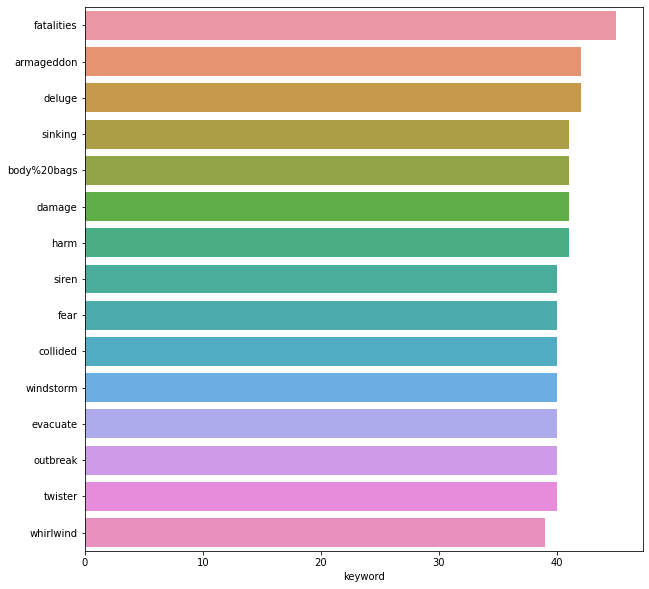

In [43]:
plt.figure(figsize=(10,10))
sns.barplot(y=train.keyword.value_counts().index[:15],x=train.keyword.value_counts()[:15])

In [44]:
#finding unique locations and plotting

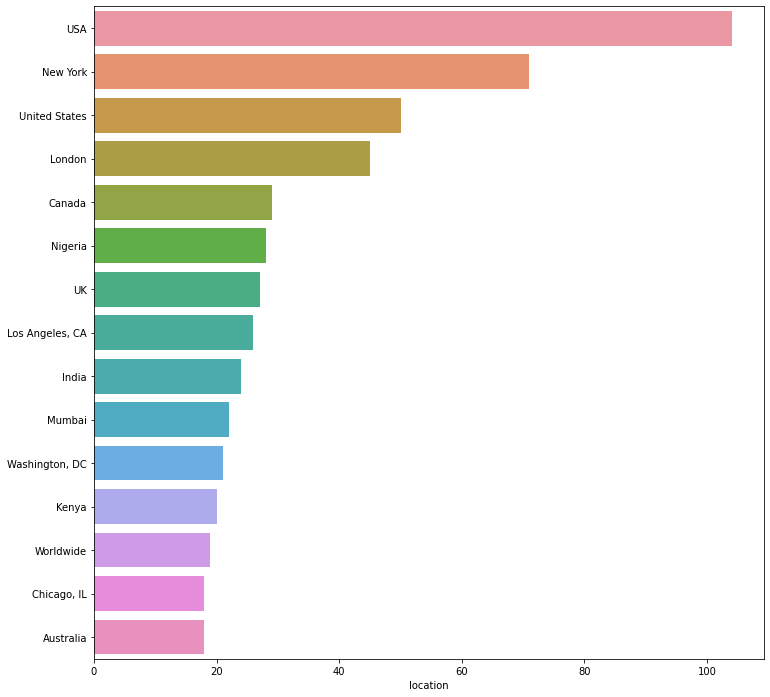

In [45]:
#least tweeted locations
plt.figure(figsize=(12,12))
sns.barplot(y=train.location.value_counts().index[:15],x=train.location.value_counts()[:15])


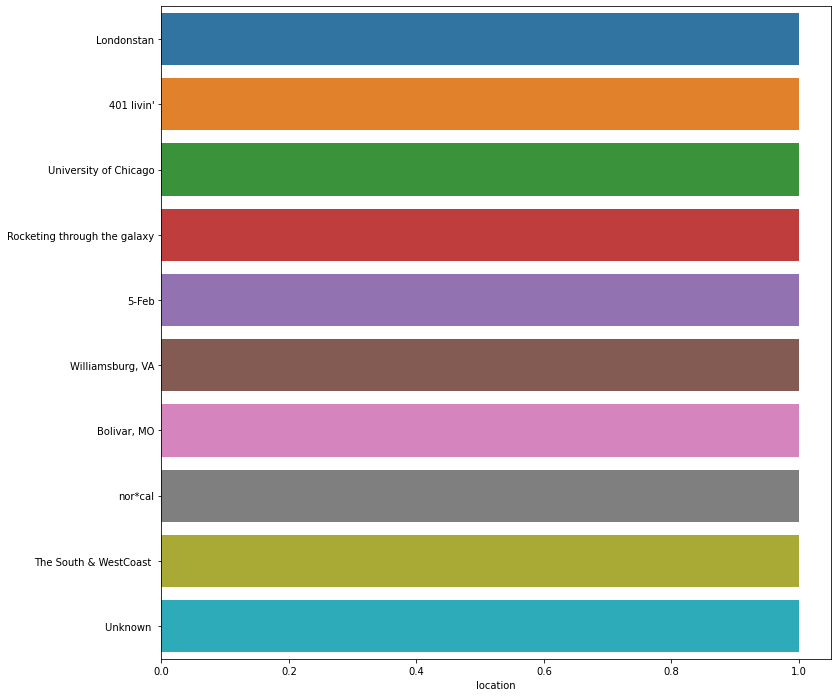

In [46]:
#least tweeted loactions
plt.figure(figsize=(12,12))
sns.barplot(y=train.location.value_counts().index[-10:],x=train.location.value_counts()[-10:])

In [47]:
#Data preprocessing by converting text to lower case,removing regular expressions and lemmatizing

In [48]:
def lowercase_text(text):
    return text.lower()

train.text=train.text.apply(lambda x: lowercase_text(x))
test.text=test.text.apply(lambda x: lowercase_text(x))

In [49]:
import re
import string

def remove_noise(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [50]:
train.text=train.text.apply(lambda x: remove_noise(x))
test.text=test.text.apply(lambda x: remove_noise(x))

In [51]:
train.text.head(5)

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [52]:
!pip install nlppreprocess
from nlppreprocess import NLP

nlp=NLP(lemmatize=True,lemmatize_method='wordnet')

In [53]:
train.text.sample(10)

5856    and then i go a ruin it all with something awf...
3788    its never a good sign when you pull up to work...
7313                  these wild fires out west are crazy
5121    quick fact no nuclear reactor has come into op...
5067    suncorp net profit rises to  billion in worst ...
392     trial date set for man charged with arson burg...
2520    fear and panic in the air i want to be free fr...
526     beautiful sweet avalanche faith and akito rose...
6472    blaaaaaaa he said as he sunk his face into you...
2820    myanmar s displaced rohingya at sittwe point o...
Name: text, dtype: object

Text(0.5, 1.0, 'Frequent Words')

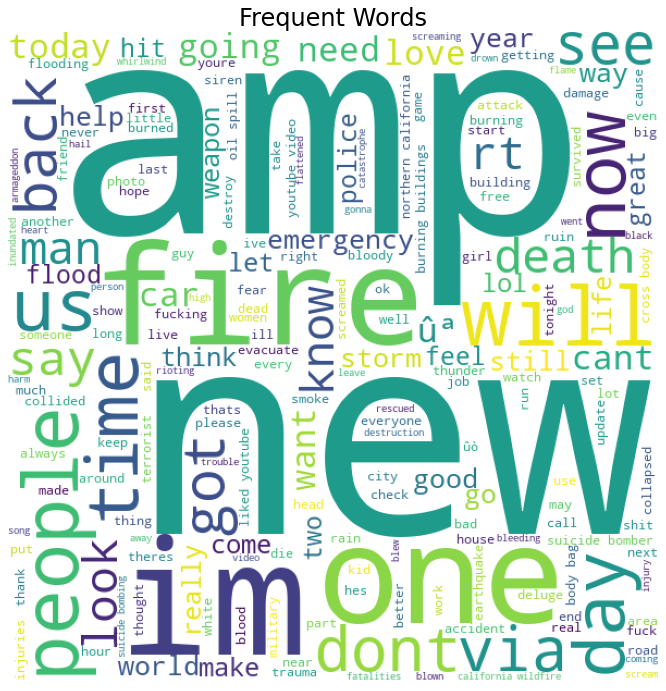

In [54]:
#using word cloud (a pictorial representation of word frequencies)

from wordcloud import WordCloud
fig , ax1 = plt.subplots(1,figsize=(12,12))
wordcloud=WordCloud(background_color='white',width=600,height=600).generate(" ".join(train.text))
ax1.imshow(wordcloud)
ax1.axis('off')
ax1.set_title('Frequent Words',fontsize=24)

In [55]:
'''
Tokenizing and Vectorizing the data using sklearn CountVectorizer
'''
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer=CountVectorizer(analyzer='word',binary=True)
count_vectorizer.fit(train.text)

train_vec = count_vectorizer.fit_transform(train.text)
test_vec = count_vectorizer.transform(test.text)

print(train_vec[9].todense())
print(test_vec[9].todense())


[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [56]:
'''
Using y variable to store the target data
'''
y=train.target

In [57]:
'''
Using Naive Bayes model for modelling
'''

from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB

model =MultinomialNB(alpha=1)
scores= model_selection.cross_val_score(model,train_vec,y,cv=6,scoring='f1')
scores

array([0.6518668 , 0.63864043, 0.65156794, 0.61466165, 0.73894189,
       0.72601556])

In [58]:
#Training the model
model.fit(train_vec,y)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [59]:
#predicting on given test set
model.predict(test_vec)

array([1, 1, 1, ..., 1, 1, 1])